
# Partie 1

**On importe les librairies nécessaires** :

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**On créé la fonction otsu** :

In [19]:
def otsu(image):
    hist = np.histogram(image, bins=256, range=(0, 256))[0] # histogramme de l'image

    total_pixels = image.size # nombre de pixels de l'image

    max_seuil = 0 # seuil optimal
    max_variance = 0 # variance maximale

    for seuil in range(256): # pour chaque seuil
        hist_1 = hist[:seuil] # histogramme de la classe 1
        hist_2 = hist[seuil:] # histogramme de la classe 2

        nb_pixels_1 = np.sum(hist_1) # nombre de pixels de la classe 1
        nb_pixels_2 = np.sum(hist_2) # nombre de pixels de la classe 2

        if nb_pixels_1 == 0 or nb_pixels_2 == 0: # si une des classes est vide, on passe au seuil suivant
            continue

        prob_1 = nb_pixels_1 / total_pixels # probabilité de la classe 1
        prob_2 = nb_pixels_2 / total_pixels # probabilité de la classe 2

        moy_1 = np.sum(np.arange(seuil) * hist_1) / nb_pixels_1 # moyenne de la classe 1
        moy_2 = np.sum(np.arange(seuil, 256) * hist_2) / nb_pixels_2 # moyenne de la classe 2

        variance = prob_1 * prob_2 * (moy_1 - moy_2) ** 2 # variance inter-classe

        if variance > max_variance: # si la variance est supérieure à la variance maximale, on met à jour le seuil optimal et la variance maximale
            max_variance = variance
            max_seuil = seuil

    return max_seuil # on retourne le seuil optimal

**On va tester sur les images en noir et blanc coins, maisons et PetiteBete :**

Seuil optimal pour l'image coins.pgm : 127
Seuil optimal pour l'image maisons.pgm : 159
Seuil optimal pour l'image PetiteBete.pgm : 129


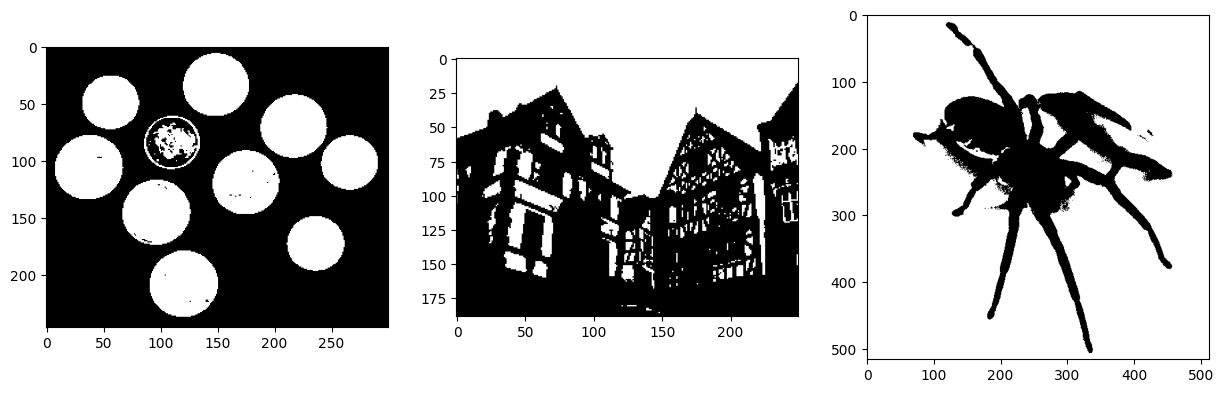

In [20]:
# On charge les images
coins = plt.imread('coins.pgm')
maisons = plt.imread('maisons.pgm')
PetiteBete = plt.imread('PetiteBete.pgm')

# On calcule le seuil optimal pour chaque image
seuil_coins = otsu(coins)
seuil_maisons = otsu(maisons)
seuil_PetiteBete = otsu(PetiteBete)

# On applique le seuil optimal à chaque image
otsu_coins = coins > seuil_coins
otsu_maisons = maisons > seuil_maisons
otsu_PetiteBete = PetiteBete > seuil_PetiteBete

# On affiche le seuil optimal pour chaque image
print("Seuil optimal pour l'image coins.pgm :", seuil_coins)
print("Seuil optimal pour l'image maisons.pgm :", seuil_maisons)
print("Seuil optimal pour l'image PetiteBete.pgm :", seuil_PetiteBete)

# On affiche les images avec le seuil optimal appliqué
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.imshow(otsu_coins, cmap='gray')

plt.subplot(132)
plt.imshow(otsu_maisons, cmap='gray')

plt.subplot(133)
plt.imshow(otsu_PetiteBete, cmap='gray')

plt.show()

# Partie 2

**On importe les librairies nécessaires** :

In [21]:
from skimage import io, util
import matplotlib.pyplot as plt
import numpy as np

**On créé la fonction kmeans** :

In [22]:
def kmeans(image, k, max_iters=100):
    img_array = util.img_as_float(image) # on convertit l'image en tableau de flottants

    if img_array.ndim == 2: # si l'image est en noir et blanc, on ajoute une dimension
        img_array = img_array[:, :, np.newaxis]

    rows, cols, channels = img_array.shape # on récupère les dimensions de l'image

    centres = img_array[np.random.choice(rows, k, replace=False), np.random.choice(cols, k, replace=False)] # on choisit k centres aléatoirement

    for iteration in range(max_iters): # pour chaque itération
        distances = np.linalg.norm(img_array - centres[:, np.newaxis, np.newaxis], axis=3) # on calcule la distance entre chaque pixel et chaque centre
        labels = np.argmin(distances, axis=0) # on attribue à chaque pixel le centre le plus proche

        for cluster_index in range(k): # pour chaque centre
            cluster_pixels = img_array[labels == cluster_index] # on récupère les pixels qui lui sont associés
            if len(cluster_pixels) > 0: # si le centre n'est associé à aucun pixel, on ne le met pas à jour
                centres[cluster_index] = np.mean(cluster_pixels, axis=0)
            else: # sinon, on le met à jour avec un pixel aléatoire
                centres[cluster_index] = img_array[np.random.choice(rows), np.random.choice(cols)]

    segmented_image = centres[labels] # on crée l'image segmentée

    return segmented_image # on retourne l'image segmentée

**On va tester sur les images en couleurs perr, feuilles et poivron :**

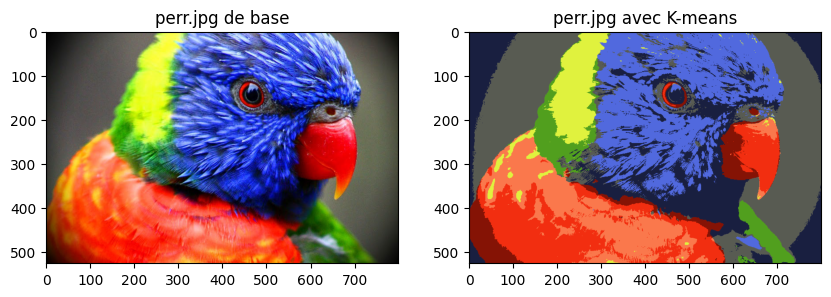

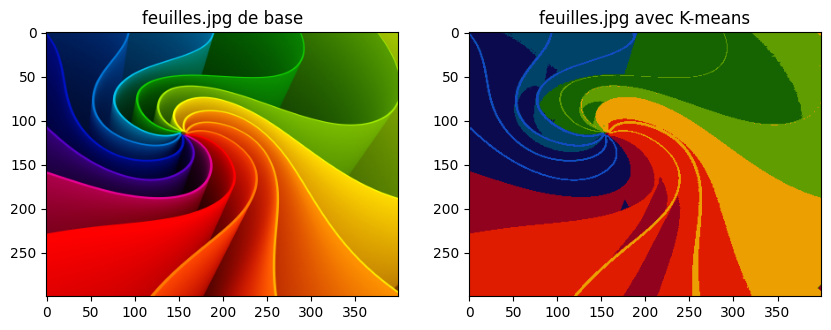

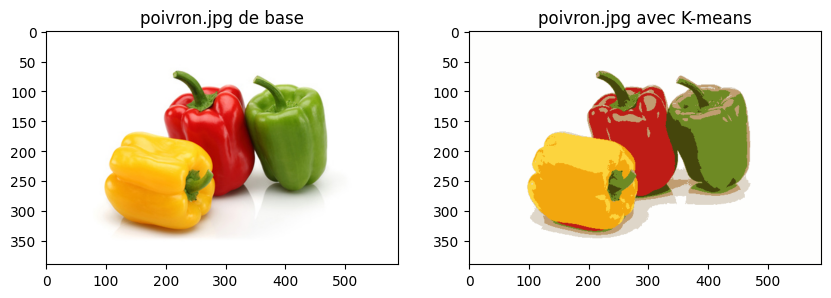

In [23]:
# On charge les images
perr = io.imread('perr.jpg')
feuilles = io.imread('feuilles.jpg')
poivron = io.imread('poivron.jpg')

# On applique l'algorithme K-means à chaque image
kmeans_perr = kmeans(perr, 8)
kmeans_feuilles = kmeans(feuilles, 8)
kmeans_poivron = kmeans(poivron, 8)

# On affiche les images avec l'algorithme K-means appliqué
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(perr)
plt.title('perr.jpg de base')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_perr)
plt.title('perr.jpg avec K-means')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(feuilles)
plt.title('feuilles.jpg de base')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_feuilles)
plt.title('feuilles.jpg avec K-means')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(poivron)
plt.title('poivron.jpg de base')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_poivron)
plt.title('poivron.jpg avec K-means')

plt.show()

# Partie 3

**On teste sur les images en noir et blanc coins, maisons et PetiteBete :**

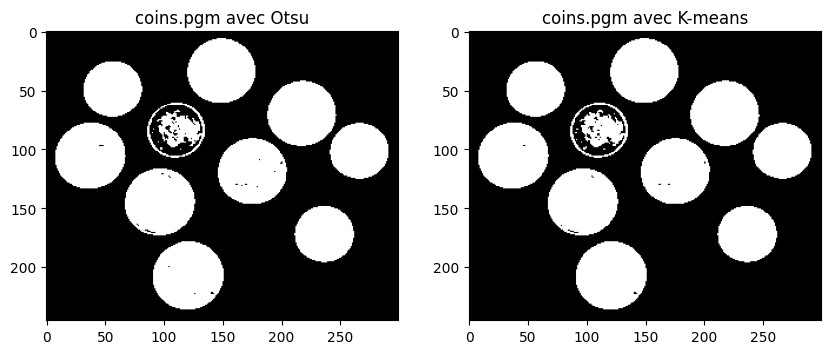

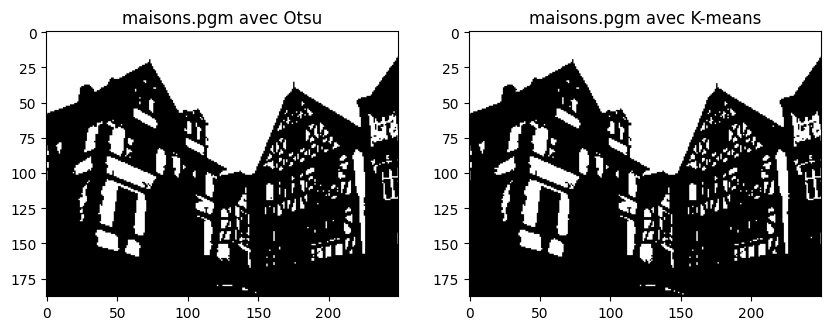

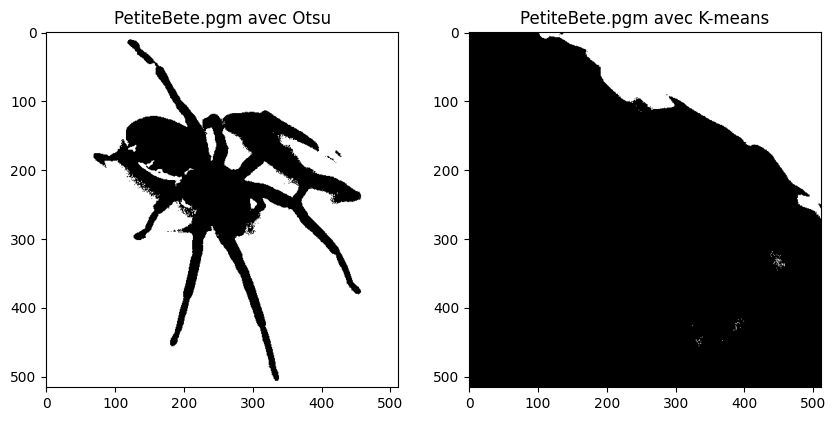

In [24]:
# On charge les images
coins = io.imread('coins.pgm')
maisons = io.imread('maisons.pgm')
PetiteBete = io.imread('PetiteBete.pgm')

# On applique l'algorithme K-means à chaque image
kmeans_coins = kmeans(coins, 2)
kmeans_maisons = kmeans(maisons, 2)
kmeans_PetiteBete = kmeans(PetiteBete, 2)

# On compare les résultats des images avec l'algorithme K-means et avec Otsu
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(otsu_coins, cmap='gray')
plt.title('coins.pgm avec Otsu')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_coins, cmap='gray')
plt.title('coins.pgm avec K-means')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(otsu_maisons, cmap='gray')
plt.title('maisons.pgm avec Otsu')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_maisons, cmap='gray')
plt.title('maisons.pgm avec K-means')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(otsu_PetiteBete, cmap='gray')
plt.title('PetiteBete.pgm avec Otsu')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_PetiteBete, cmap='gray')
plt.title('PetiteBete.pgm avec K-means')

plt.show()

**Résultats :**<br><br>Après plusieurs essais, il est observé que l'algorithme du k-means présente une efficacité moindre par rapport à celui d'Otsu lorsqu'il s'agit de détecter seulement deux clusters.<br>
En effet, le processus d'exécution est plus chronophage, et sa nature aléatoire entraîne une variabilité des résultats, pouvant poser des problèmes et engendrer des erreurs.

# Partie 4

**On teste sur les images en couleurs mimi1, mimi2 et mimi3 :**

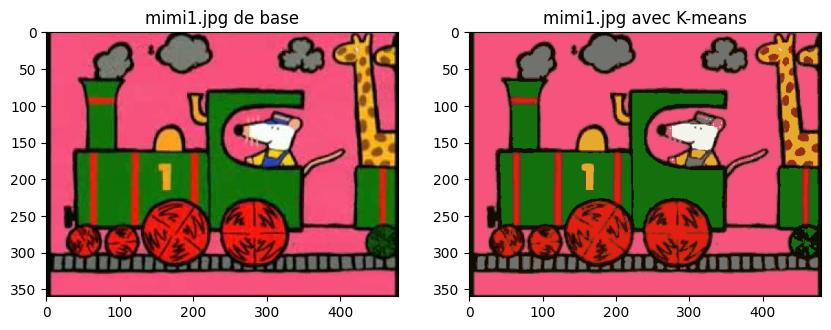

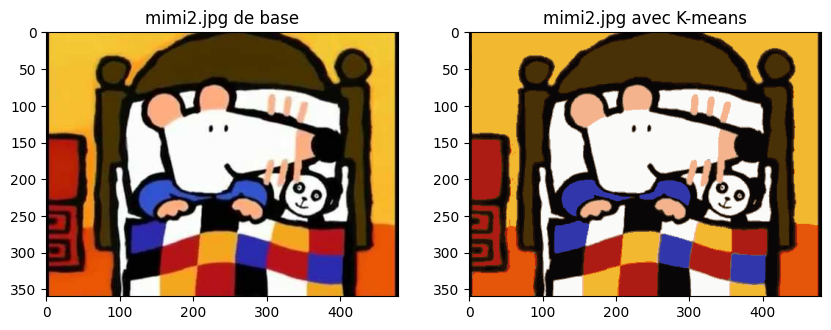

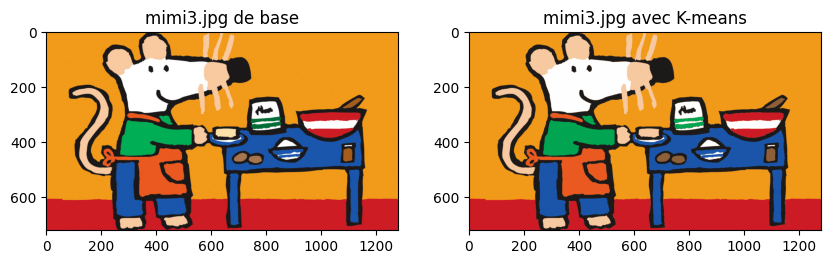

In [25]:
# On charge les images
mimi1 = io.imread('mimi1.jpg')
mimi2 = io.imread('mimi2.jpg')
mimi3 = io.imread('mimi3.jpg')

# On applique l'algorithme K-means à chaque image
kmeans_mimi1 = kmeans(mimi1, 12)
kmeans_mimi2 = kmeans(mimi2, 11)
kmeans_mimi3 = kmeans(mimi3, 10)

# On affiche les images avec l'algorithme K-means appliqué
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mimi1)
plt.title('mimi1.jpg de base')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_mimi1)
plt.title('mimi1.jpg avec K-means')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mimi2)
plt.title('mimi2.jpg de base')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_mimi2)
plt.title('mimi2.jpg avec K-means')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mimi3)
plt.title('mimi3.jpg de base')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_mimi3)
plt.title('mimi3.jpg avec K-means')

plt.show()

**Résultats :**
<br><br>
D'après les résultats obtenus, les résultats sont à peu près stables lorsque le nombre de clusters est proche de la réalité, c'est-à-dire lorsque le nombre de clusters est à :
- 12 pour l'image mimi1
- 11 pour l'image mimi2
- 10 pour l'image mimi3.
<br>

Cependant, étant donner que l'algorithme est aléatoire, il est possible d'obtenir des résultats différents à chaque exécution et donc potentiellement des résultats moins bons ou carrément faux.
<br>
C'est donc pour cela que l'on doit trouver une méthode pour déterminer le nombre de clusters et ainsi augmenter la stabilité des résultats.